In [1]:
from TCN_BIRTH import endtoend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#TIME SERIES BIRTH RATES
ts = pd.read_csv('birth-death/live-birth.csv', thousands=",").T
ts.iloc[0][0] = "Total Live-Births"
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')
ts['time'] = pd.PeriodIndex(ts['quarter'], freq='Q').to_timestamp()

/tmp/ipykernel_53350/2561070917.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [2]:
## LABOUR COST ACROSS INDUSTRIES ( FACTOR PAYMENTS)

## labour cost per industry data
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
## across industries data
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
### COMBINED industries
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
combined_lc.pivot(index="quarter", columns=sector, values="value")

test_lc =pd.merge(ts, df_lc, on='quarter', how='inner')
raw_lc = test_lc.dropna().reset_index(drop=True)
raw_lc = raw_lc[::-1].reset_index(drop = True)
raw_lc

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time,Unit Labour Cost Of Accommodation & Food Services,...,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1986-Q1,9954,4414,3553,1433,316,103,61,1986-01-01,59.7,...,67.5,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0
1,1986-Q2,9353,4186,3367,1271,332,87,50,1986-04-01,56.2,...,57.3,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5
2,1986-Q3,9854,4398,3475,1395,359,98,44,1986-07-01,54.6,...,67.8,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1
3,1986-Q4,10239,4782,3423,1454,351,98,51,1986-10-01,56.5,...,72.6,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1
4,1987-Q1,8834,4007,3053,1234,320,81,56,1987-01-01,56.2,...,78.9,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-Q2,9427,4387,3338,1168,374,94,66,2018-04-01,97.9,...,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9
130,2018-Q3,9841,4574,3532,1224,337,116,58,2018-07-01,93.6,...,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8
131,2018-Q4,10173,4711,3670,1232,372,109,79,2018-10-01,104.7,...,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
132,2019-Q1,9402,4456,3316,1128,316,105,81,2019-01-01,111.1,...,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1


In [3]:
target = list(raw_lc)[1]
cols = list(raw_lc)[9:20]
timelist = list(raw_lc['time'])
print('Training set shape:{}'.format(test_lc.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(136, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities']


mse:  10046682.0 mae:  2800.771


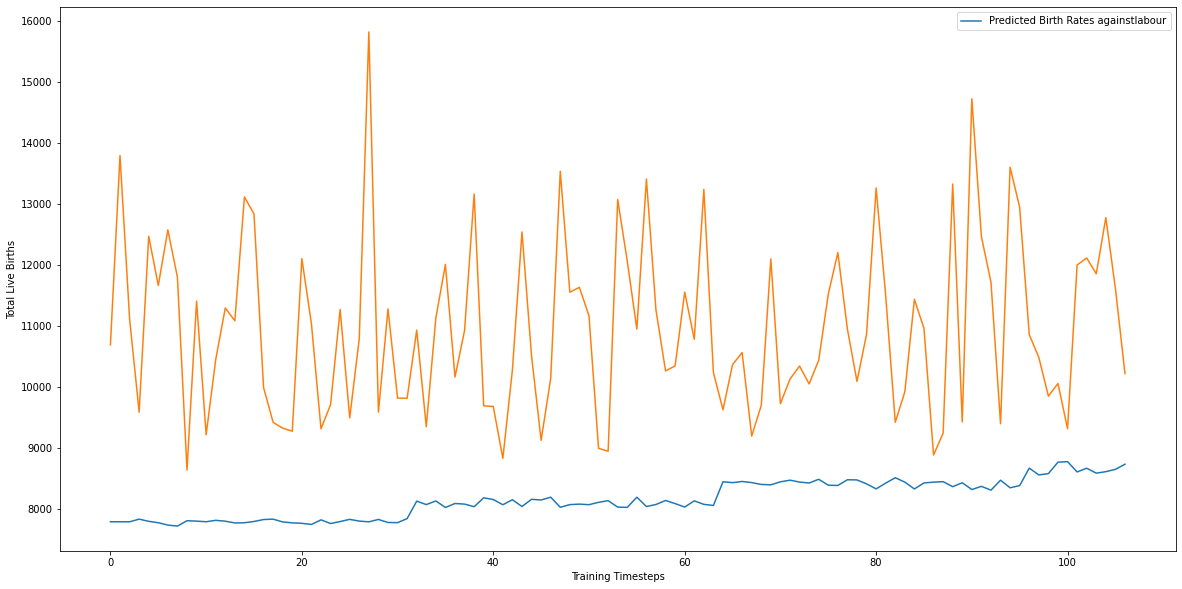

Iter:  0 train_loss:  0.7372755110263824 val_loss:  0.19817906618118286
Iter:  1 train_loss:  0.3663274124264717 val_loss:  0.10235491394996643
Iter:  2 train_loss:  0.2275395281612873 val_loss:  0.0934768095612526
Iter:  3 train_loss:  0.20378060638904572 val_loss:  0.09408999979496002
Iter:  4 train_loss:  0.15808917116373777 val_loss:  0.0972403883934021
Iter:  5 train_loss:  0.19283824414014816 val_loss:  0.09077523648738861
Iter:  6 train_loss:  0.15799249708652496 val_loss:  0.0821906179189682
Iter:  7 train_loss:  0.1339762769639492 val_loss:  0.08044713735580444
Iter:  8 train_loss:  0.13167734444141388 val_loss:  0.07783273607492447
Iter:  9 train_loss:  0.1139375139027834 val_loss:  0.07712241262197495
Iter:  10 train_loss:  0.10871228948235512 val_loss:  0.07247339934110641
Iter:  11 train_loss:  0.09268862754106522 val_loss:  0.06505927443504333
Iter:  12 train_loss:  0.08086161687970161 val_loss:  0.06622796505689621
Iter:  13 train_loss:  0.06838127411901951 val_loss:  0.

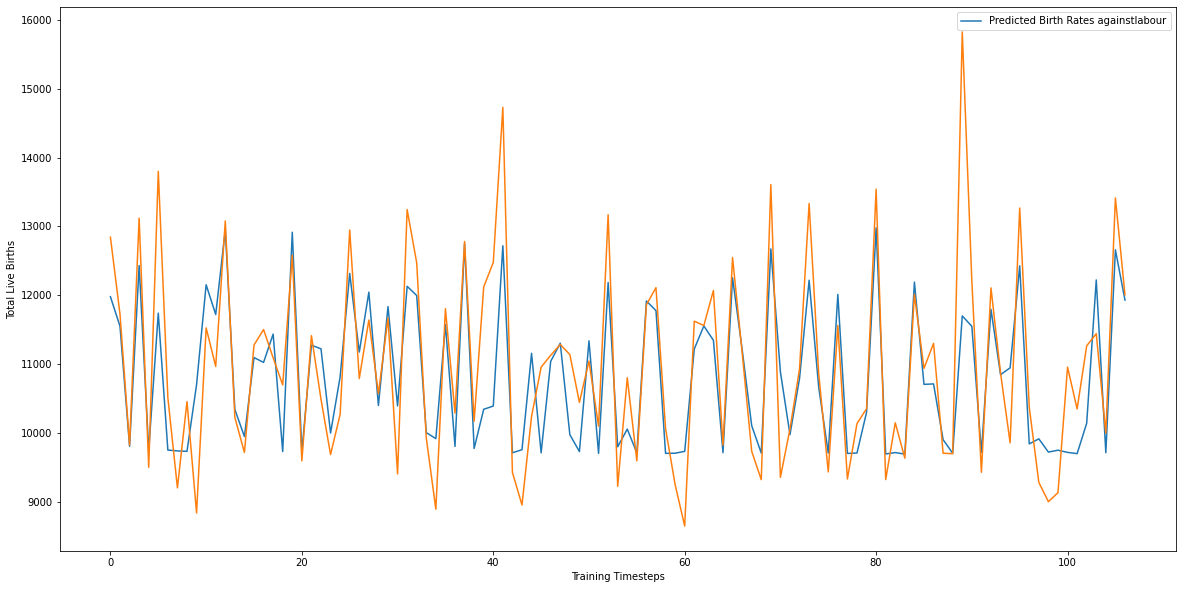

Iter:  20 train_loss:  0.05054710805416107 val_loss:  0.07472044229507446
Iter:  21 train_loss:  0.05045192129909992 val_loss:  0.0603087916970253
Iter:  22 train_loss:  0.041005720384418964 val_loss:  0.0688384473323822
Iter:  23 train_loss:  0.04348675161600113 val_loss:  0.07172559946775436
Iter:  24 train_loss:  0.03864166233688593 val_loss:  0.06117218732833862
Iter:  25 train_loss:  0.04098844854161143 val_loss:  0.07440967857837677
Mean Square Error: 0.0707584 | Mean Absolute Error: 0.21058445


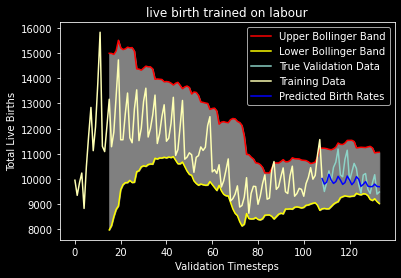

<Figure size 12000x12000 with 0 Axes>

In [4]:
endtoend(target, cols, raw_lc, "labour")

In [ ]:
## taxes withdrawalas
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
## across industries data
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
### COMBINED industries
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
combined_lc.pivot(index="quarter", columns=sector, values="value")

test_lc =pd.merge(ts, df_lc, on='quarter', how='inner')
raw_lc = test_lc.dropna().reset_index(drop=True)
raw_lc = raw_lc[::-1].reset_index(drop = True)
raw_lc

In [84]:

gdp = pd.read_csv("./gdp.csv", header='infer', skiprows=10, skipfooter=18,engine='python', thousands=",").T
gdp = gdp.rename(columns=gdp.iloc[0]).drop(gdp.index[0])
gdp = gdp[::-1]
gdp.reset_index(level=0, inplace=True)
gdp = gdp.rename(columns={'index': 'quarter'})
gdp['quarter'] =gdp['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')

test_gdp =pd.merge(ts, gdp, on='quarter', how='inner')
raw_gdp = test_gdp.dropna().reset_index(drop=True) # row
#raw_gdp = raw_gdp.dropna(axis=1, how='any') # column
raw_gdp = raw_gdp[::-1].reset_index(drop = True)
raw_gdp = raw_gdp.drop(columns=raw_gdp.columns[(raw_gdp == 'na').any()])

/tmp/ipykernel_53350/2605252279.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  gdp['quarter'] =gdp['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [85]:
target = list(raw_gdp)[1]
cols = list(raw_gdp)[9:26]
timelist = list(raw_gdp['time'])
print('Training set shape:{}'.format(raw_gdp.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(142, 26)
Length of Time Series: 142
Feature targetted: Total Live-Births
Featured selected: ['GDP In Chained (2015) Dollars', '  Goods Producing Industries', '    Manufacturing', '    Construction', '    Utilities', '    Other Goods Industries', '  Services Producing Industries', '    Wholesale & Retail Trade', '    Transportation & Storage', '    Accommodation & Food Services', '    Information & Communications', '    Finance & Insurance', '    Real Estate, Professional Services And Administrative & Support Services', '    Other Services Industries', '  Ownership Of Dwellings', '  Gross Value Added At Basic Prices', '  Add: Taxes On Products']


mse:  5237140.0 mae:  1806.8268


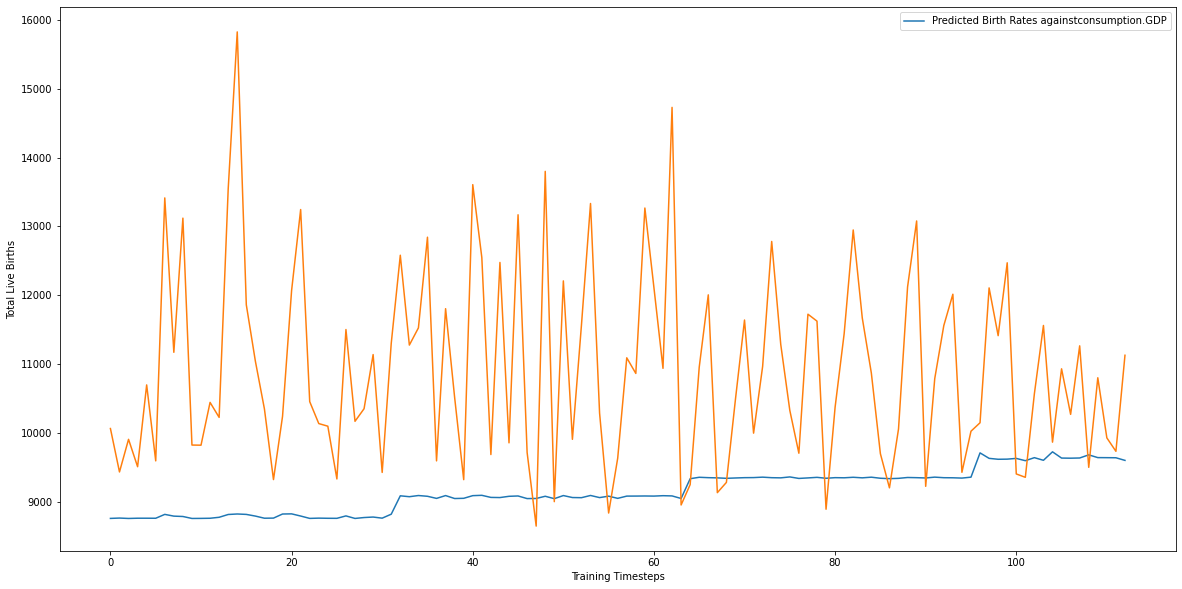

Iter:  0 train_loss:  0.37505047023296356 val_loss:  0.1406310647726059
Iter:  1 train_loss:  0.207550797611475 val_loss:  0.07903269678354263
Iter:  2 train_loss:  0.17517589777708054 val_loss:  0.06830666959285736
Iter:  3 train_loss:  0.15295258536934853 val_loss:  0.07017584145069122
Iter:  4 train_loss:  0.14235196448862553 val_loss:  0.07785023003816605
Iter:  5 train_loss:  0.1310549695044756 val_loss:  0.07989635318517685
Iter:  6 train_loss:  0.12144335173070431 val_loss:  0.06877080351114273
Iter:  7 train_loss:  0.09026642329990864 val_loss:  0.05652559921145439
Iter:  8 train_loss:  0.07421487383544445 val_loss:  0.0753268301486969
Iter:  9 train_loss:  0.08372604567557573 val_loss:  0.06630729883909225
Iter:  10 train_loss:  0.07663913816213608 val_loss:  0.05297912657260895
Iter:  11 train_loss:  0.0763136874884367 val_loss:  0.07461989670991898
Iter:  12 train_loss:  0.0713574355468154 val_loss:  0.06286194920539856
Iter:  13 train_loss:  0.07080338150262833 val_loss:  0

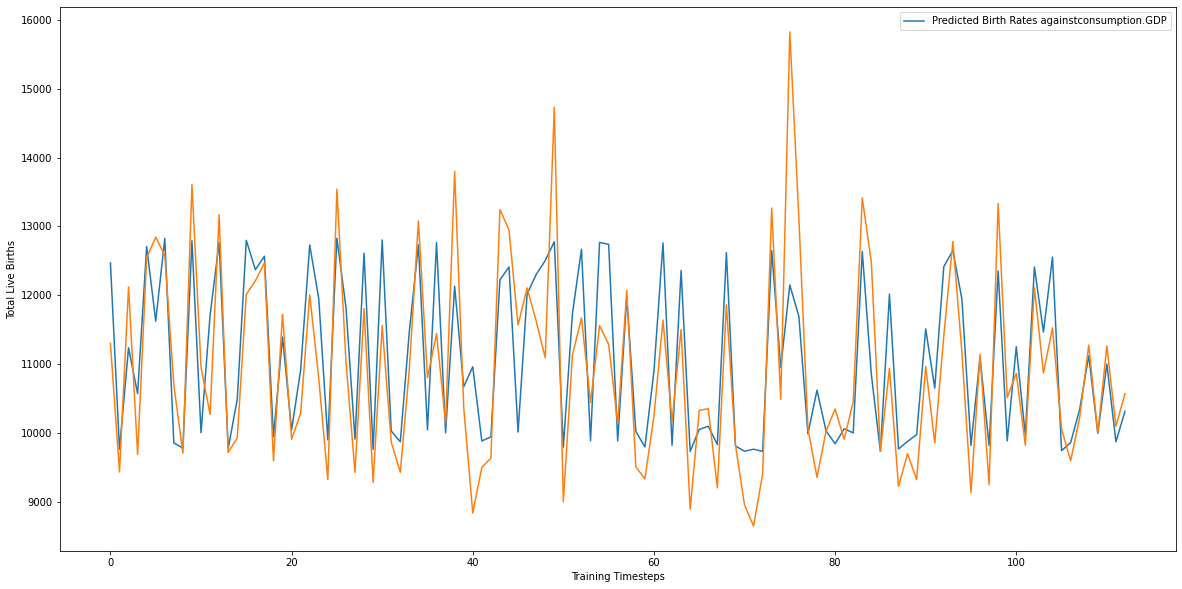

Iter:  20 train_loss:  0.05069251824170351 val_loss:  0.06275627762079239
Iter:  21 train_loss:  0.050392142962664366 val_loss:  0.06273135542869568
Iter:  22 train_loss:  0.051908704452216625 val_loss:  0.059501100331544876
Iter:  23 train_loss:  0.05029997881501913 val_loss:  0.06604048609733582
Iter:  24 train_loss:  0.05334080010652542 val_loss:  0.060843661427497864
Iter:  25 train_loss:  0.05605799052864313 val_loss:  0.059959620237350464
Iter:  26 train_loss:  0.04902766831219196 val_loss:  0.06933435797691345
Iter:  27 train_loss:  0.04915590584278107 val_loss:  0.06079578027129173
Iter:  28 train_loss:  0.04545419942587614 val_loss:  0.06266716867685318
Mean Square Error: 0.06596091 | Mean Absolute Error: 0.21325776


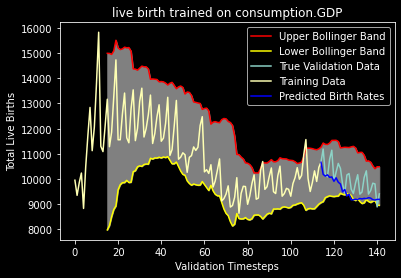

<Figure size 12000x12000 with 0 Axes>

In [86]:
endtoend(target, cols, raw_gdp, "consumption.GDP")